In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [41]:
# Simple dataset creation for work commute decisions
def create_commute_data():
    """Create a focused dataset for daily work transportation decisions"""
    data = {
        'weather': [1, 1, 2, 2, 3, 3, 4, 4] * 25,  # 1=sunny, 2=cloudy, 3=rainy, 4=stormy
        'time_available': [1, 2, 1, 2, 1, 2, 1, 2] * 25,  # 1=rushed, 2=plenty of time
        'traffic_level': [1, 3, 1, 3, 1, 3, 1, 3] * 25,  # 1=light, 3=heavy
        'transportation': ['Drive', 'Walk', 'Drive', 'Bus', 
                          'Drive', 'Bike', 'Work from Home', 'Drive'] * 25
    }
    return pd.DataFrame(data)

# Create and prepare data
df = create_commute_data()
print("🚗 Work Commute Decision Dataset:")
print(df.head(8))
print(f"\nDataset size: {len(df)} samples")

🚗 Work Commute Decision Dataset:
   weather  time_available  traffic_level  transportation
0        1               1              1           Drive
1        1               2              3            Walk
2        2               1              1           Drive
3        2               2              3             Bus
4        3               1              1           Drive
5        3               2              3            Bike
6        4               1              1  Work from Home
7        4               2              3           Drive

Dataset size: 200 samples


In [42]:
# Show the mapping for clarity
weather_map = {1: 'Sunny', 2: 'Cloudy', 3: 'Rainy', 4: 'Stormy'}
time_map = {1: 'Rushed', 2: 'Plenty of Time'}
traffic_map = {1: 'Light Traffic', 3: 'Heavy Traffic'}

print("\n📋 Decision Factors:")
print("Weather: 1=Sunny, 2=Cloudy, 3=Rainy, 4=Stormy")
print("Time: 1=Rushed, 2=Plenty of Time")
print("Traffic: 1=Light, 3=Heavy")


📋 Decision Factors:
Weather: 1=Sunny, 2=Cloudy, 3=Rainy, 4=Stormy
Time: 1=Rushed, 2=Plenty of Time
Traffic: 1=Light, 3=Heavy


In [43]:
# Prepare features and target
X = df[['weather', 'time_available', 'traffic_level']]
y = df['transportation']

In [44]:
# Train simple decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


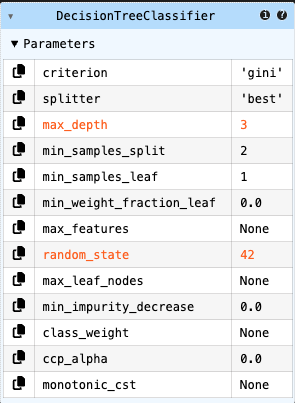

In [45]:
# Check accuracy
accuracy = tree.score(X, y)
print(f"\n🎯 Model Accuracy: {accuracy:.1%}")


🎯 Model Accuracy: 100.0%


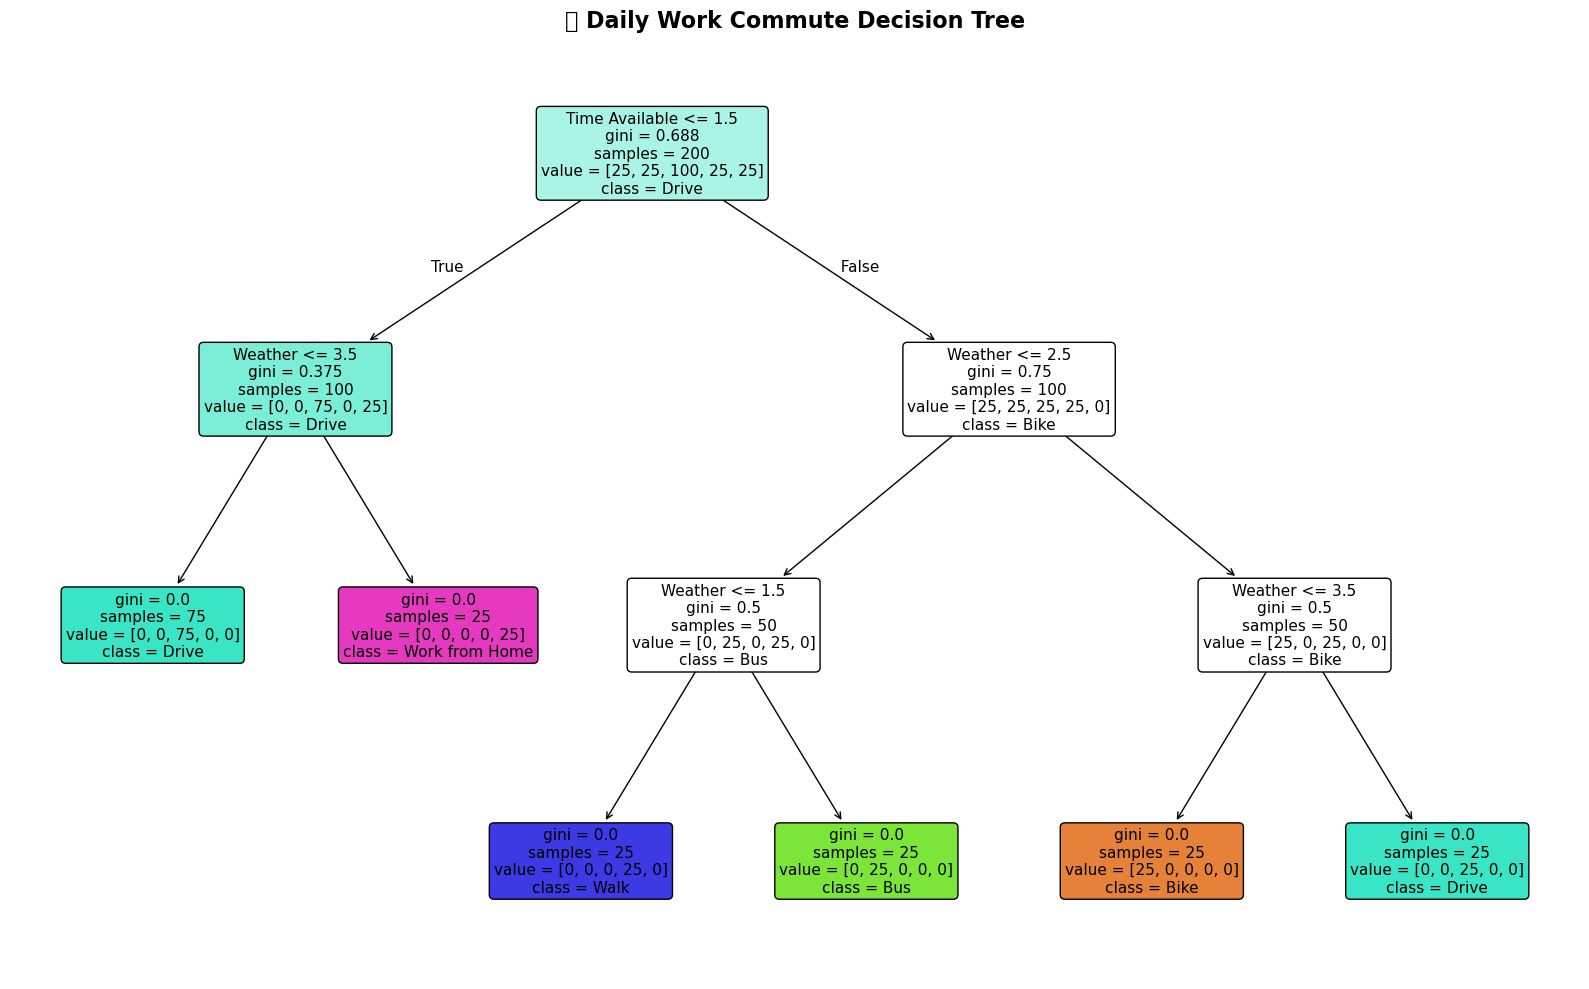

In [46]:
# Create visualization
plt.figure(figsize=(16, 10))
plot_tree(tree, 
          feature_names=['Weather', 'Time Available', 'Traffic Level'],
          class_names=tree.classes_,
          filled=True,
          rounded=True,
          fontsize=11)
plt.title('🚗 Daily Work Commute Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/work_commute_tree.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# Simple prediction function
def predict_commute(weather, time_available, traffic):
    """Predict transportation method based on 3 factors"""
    prediction = tree.predict([[weather, time_available, traffic]])[0]
    return prediction

In [48]:
# Test examples with readable descriptions
print("\n🔮 Commute Predictions:")
examples = [
    (1, 1, 1, "Sunny, Rushed, Light Traffic"),
    (3, 2, 3, "Rainy, Plenty of Time, Heavy Traffic"),
    (4, 1, 3, "Stormy, Rushed, Heavy Traffic"),
    (2, 2, 1, "Cloudy, Plenty of Time, Light Traffic")
]

for weather, time, traffic, description in examples:
    result = predict_commute(weather, time, traffic)
    print(f"🌤️ {description} → {result}")


🔮 Commute Predictions:
🌤️ Sunny, Rushed, Light Traffic → Drive
🌤️ Rainy, Plenty of Time, Heavy Traffic → Bike
🌤️ Stormy, Rushed, Heavy Traffic → Work from Home
🌤️ Cloudy, Plenty of Time, Light Traffic → Bus


In [49]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': ['Weather', 'Time Available', 'Traffic Level'],
    'Importance': tree.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n📊 Feature Importance:")
for _, row in feature_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.3f}")



📊 Feature Importance:
Weather: 0.818
Time Available: 0.182
Traffic Level: 0.000


In [50]:
# Show decision path for one example
print(f"\n🛣️ Decision Logic Sample:")
print("If it's stormy (weather ≥ 3.5) → Work from Home")
print("If sunny/cloudy and rushed → Drive")
print("If good weather and time → Walk/Bike/Bus based on traffic")


🛣️ Decision Logic Sample:
If it's stormy (weather ≥ 3.5) → Work from Home
If sunny/cloudy and rushed → Drive
If good weather and time → Walk/Bike/Bus based on traffic
